In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# dataset: https://www.kaggle.com/datasets/barkhaverma/student-performance

In [169]:
# Importing and understanding of data.
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'final_grade' ]
data = pd.read_csv('/content/student-por.csv', sep=",")
data.columns = data_names
print(len(data.values))
print(data.dtypes)
data = data.drop_duplicates()
data.head(10)

649
school                         object
sex                            object
age                             int64
address                        object
family_size                    object
parent_cohabition_status       object
mother_education                int64
father_education                int64
mother_job                     object
father_job                     object
reason                         object
guardian                       object
traveltime                      int64
studytime                       int64
failures                        int64
school_support                 object
family_support                 object
paid                           object
extra_curricular_activities    object
nursery                        object
higher                         object
internet_access                object
romantic                       object
famrel                          int64
freetime                        int64
going_out                       int64
workday_

,school,sex,age,address,family_size,parent_cohabition_status,mother_education,father_education,mother_job,father_job,...,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [170]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

# the final grade seems to be most negatively correlated with number of failures in past classes and also weekday alcohol consumption
# it seems to be most positively correlated with studytime, mother's education (almost as much as studytime!), but mainly grades from previos periods. 

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11
mother_education,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24
father_education,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12
going_out,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09
workday_alcohol,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20


In [171]:
# We can see that the final grade is highly correlated with grades in other period.
# Since these are very simular, we remove these columns too not get overly optimistic results on the algorithm. 
data = data.drop(['grade_period1', 'grade_period2'], axis=1)

In [172]:
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'final_grade']
# there are 14 numerical attributes.  

In [182]:
# https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html 

# categorical_columns = ['school', 'sex', 'family_size', 'parent_cohabition_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']

categorical_columns = data.select_dtypes('object')

# categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
# numerical_preprocessor = StandardScaler()
# preprocessor = ColumnTransformer([('one-hot-encoder', categorical_preprocessor, categorical_columns),('standard_scaler', numerical_preprocessor, numerical_columns)])

encoded_data = pd.get_dummies(categorical_columns)  # drop_first=True


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
print(scaled_dataframe.columns)
scaled_dataframe.head()

for column in numerical_columns:
  encoded_data.append(scaled_dataframe[column])
  encoded_data[column] = scaled_dataframe[column]

Index(['age', 'mother_education', 'father_education', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences',
       'final_grade'],
      dtype='object')


In [174]:
corr = encoded_data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,family_size_GT3,family_size_LE3,parent_cohabition_status_A,parent_cohabition_status_T,mother_job_at_home,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_at_home,father_job_health,father_job_other,father_job_services,father_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_support_no,school_support_yes,family_support_no,family_support_yes,paid_no,paid_yes,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,final_grade
school_GP,1.00,-1.00,-0.08,0.08,-0.35,0.35,0.02,-0.02,0.03,-0.03,-0.20,0.07,-0.04,0.12,0.10,-0.14,0.05,0.06,-0.06,0.09,-0.12,0.14,-0.21,0.16,-0.07,0.05,0.02,-0.12,0.12,-0.06,0.06,-0.01,0.01,-0.09,0.09,0.00,-0.00,-0.14,0.14,-0.24,0.24,0.07,-0.07,-0.09,0.25,0.21,-0.25,0.14,-0.11,0.03,-0.03,-0.04,-0.05,-0.01,0.06,0.16,0.28
school_MS,-1.00,1.00,0.08,-0.08,0.35,-0.35,-0.02,0.02,-0.03,0.03,0.20,-0.07,0.04,-0.12,-0.10,0.14,-0.05,-0.06,0.06,-0.09,0.12,-0.14,0.21,-0.16,0.07,-0.05,-0.02,0.12,-0.12,0.06,-0.06,0.01,-0.01,0.09,-0.09,-0.00,0.00,0.14,-0.14,0.24,-0.24,-0.07,0.07,0.09,-0.25,-0.21,0.25,-0.14,0.11,-0.03,0.03,0.04,0.05,0.01,-0.06,-0.16,-0.28
sex_F,-0.08,0.08,1.00,-1.00,0.03,-0.03,0.10,-0.10,0.06,-0.06,0.13,-0.04,0.02,-0.06,-0.10,0.05,0.01,0.03,-0.05,-0.04,0.05,-0.06,-0.03,0.03,-0.04,0.03,0.01,-0.11,0.11,-0.13,0.13,0.08,-0.08,0.12,-0.12,-0.04,0.04,-0.06,0.06,0.07,-0.07,-0.11,0.11,0.04,-0.12,-0.08,-0.04,0.21,-0.07,-0.08,-0.15,-0.06,-0.28,-0.32,-0.14,-0.02,0.13
sex_M,0.08,-0.08,-1.00,1.00,-0.03,0.03,-0.10,0.10,-0.06,0.06,-0.13,0.04,-0.02,0.06,0.10,-0.05,-0.01,-0.03,0.05,0.04,-0.05,0.06,0.03,-0.03,0.04,-0.03,-0.01,0.11,-0.11,0.13,-0.13,-0.08,0.08,-0.12,0.12,0.04,-0.04,0.06,-0.06,-0.07,0.07,0.11,-0.11,-0.04,0.12,0.08,0.04,-0.21,0.07,0.08,0.15,0.06,0.28,0.32,0.14,0.02,-0.13
address_R,-0.35,0.35,0.03,-0.03,1.00,-1.00,0.05,-0.05,-0.09,0.09,0.17,-0.08,0.04,-0.10,-0.07,-0.02,-0.07,0.06,-0.01,-0.03,0.07,-0.16,0.09,0.01,-0.00,-0.02,0.04,0.02,-0.02,0.01,-0.01,-0.03,0.03,-0.01,0.01,0.02,-0.02,0.08,-0.08,0.18,-0.18,-0.03,0.03,0.03,-0.19,-0.14,0.34,-0.06,0.06,0.03,0.04,-0.02,0.05,0.01,-0.00,-0.07,-0.17
address_U,0.35,-0.35,-0.03,0.03,-1.00,1.00,-0.05,0.05,0.09,-0.09,-0.17,0.08,-0.04,0.10,0.07,0.02,0.07,-0.06,0.01,0.03,-0.07,0.16,-0.09,-0.01,0.00,0.02,-0.04,-0.02,0.02,-0.01,0.01,0.03,-0.03,0.01,-0.01,-0.02,0.02,-0.08,0.08,-0.18,0.18,0.03,-0.03,-0.03,0.19,0.14,-0.34,0.06,-0.06,-0.03,-0.04,0.02,-0.05,-0.01,0.00,0.07,0.17
family_size_GT3,0.02,-0.02,0.10,-0.10,0.05,-0.05,1.00,-1.00,-0.24,0.24,-0.01,-0.01,0.06,-0.02,-0.04,-0.02,-0.02,-0.02,-0.00,0.08,0.03,-0.02,0.05,-0.05,0.01,-0.02,0.02,-0.06,0.06,-0.04,0.04,-0.05,0.05,-0.01,0.01,0.10,-0.10,0.00,-0.00,0.01,-0.01,-0.03,0.03,0.00,0.01,0.04,-0.01,0.01,0.07,-0.00,0.02,0.00,-0.06,-0.08,-0.00,-0.00,-0.05
family_size_LE3,-0.02,0.02,-0.10,0.10,-0.05,0.05,-1.00,1.00,0.24,-0.24,0.01,0.01,-0.06,0.02,0.04,0.02,0.02,0.02,0.00,-0.08,-0.03,0.02,-0.05,0.05,-0.01,0.02,-0.02,0.06,-0.06,0.04,-0.04,0.05,-0.05,0.01,-0.01,-0.10,0.10,-0.00,0.00,-0.01,0.01,0.03,-0.03,-0.00,-0.01,-0.04,0.01,-0.01,-0.07,0.00,-0.02,-0.00,0.06,0.08,0.00,0.00,0.05
parent_cohabition_status_A,0.03,-0.03,0.06,-0.06,-0.09,0.09,-0.24,0.24,1.00,-1.00,-0.04,-0.02,0.03,0.04,-0.03,0.02,0.00,0.07,-0.10,0.01,-0.04,0.04,-0.04,0.04,-0.14,0.07,0.11,-0.01,0.01,0.01,-0.01,0.02,-0.02,0.10,-0.10,-0.03,0.03,0.02,-0.02,0.06,-0.06,-0.05,0.05,0.01,0.06,0.03,-0.04,0.01,0.01,-0.05,-0.04,-0.03,-0.04,-0.07,-0.01,0.12,0.00
parent_cohabition_status_T,-0.03,0.03,-0.06,0.06,0.09,-0.09,0.24,-0.24,-1.00,1.00,0.04,0.02,-0.03,-0.04,0.03,-0.02,-0.00,-0.07,0.10,-0.01,0.04,-0.04,0.04,-0.04,0.14,-0.07,-0.11,0.01,-0.01,-0.01,0.01,-0.02,0.02,-0.10,0.10,0.0

In [183]:
# Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty.
# This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

X_encoded = pd.get_dummies(data.drop("final_grade", axis=1)) 
y_encoded = data["final_grade"]

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=1) 

# We will also divide into a validation set to choose models based on
X_train_encoded, X_val, y_train_encoded, y_val = train_test_split(X_train_encoded, y_train_encoded, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 


lasso_model_total = Lasso(alpha = 0.1)  # A LASSO model with all the features

lasso_model_total.fit(X_train_encoded, y_train_encoded)
yhat_tot_lasso = lasso_model_total.predict(X_val)    # the prediction
print(yhat_tot_lasso)

[11.964145   12.84666121 12.24868274 12.9787995  13.94100082 12.72258111
 12.71435999 12.34553916 10.97187448  9.83546273 11.74968155 13.19072237
 11.91317167  8.92098281 13.09866524 13.36450109 12.30761673 12.92690135
 12.48946857 12.85084762 11.30028092 10.57161455 13.41363352 10.49518203
 10.17858323 13.86312661 11.92230108 13.34423432 10.21664704 13.95177192
 13.3696455   7.94961076 11.5659629  12.63255561 12.49921104 11.30470473
 12.21146891 11.46547884 12.85587278 10.81106277 10.64797614 12.98847603
  9.84879414 12.46915469 12.56060941 12.98495975 10.78394334 11.54707468
 13.86374423 11.86596614 12.24223796 11.48141753 12.96868932 12.79316174
 13.66178338 11.61032802 12.52131557 11.11842551 11.93043119 11.17053634
 12.10575961 11.88191911 13.49583962 11.18863789  9.31334688 12.28722005
 12.98011338 13.66920988 12.78090199 11.87233432 13.05466667 12.5214809
 12.64976509 14.36530262 11.42486838 12.98435762  9.20237439 12.05622246
 12.10196345 11.11320732  9.85172538 13.70497166 13.

In [184]:
# Let's evaluate how well the model did

mse_tot = mean_squared_error(y_val, yhat_tot_lasso)   

print("Mean squared error on test set: %.10f" % mse_tot)

rmse_tot = mean_squared_error(y_val, yhat_tot_lasso, squared = False)  

print("Root mean squared error on test set: %.10f" % rmse_tot)  # RMSE measures the average difference between values predicted by a model and the actual values.
# The lower the RMSE, the better a given model is able to “fit” a dataset.

r2_tot_score = r2_score(y_val, yhat_tot_lasso)   # Coefficient of determination. Best possible r2 score is 1.0
print("R^2 score on the test set_ %.10f" % r2_tot_score)

cross_val = cross_val_score(lasso_model_total, X_val, y_val, cv=10,scoring=None, error_score = "raise").mean()
print("Cross-validation accuracy score:", cross_val) 
# The resulting cross-validation score is the average accuracy of the model across all 10 folds.


Mean squared error on test set: 8.1471223132
Root mean squared error on test set: 2.8543164354
R^2 score on the test set_ 0.2237598824
Cross-validation accuracy score: 0.08066742447673383


56


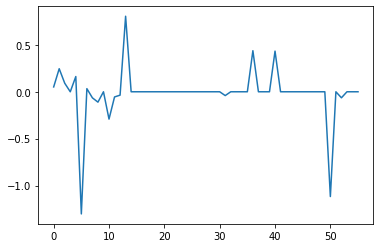

Chosen features:

school
sex
age
family_size
parent_cohabition_status
mother_education
father_education
mother_job
reason
guardian
traveltime
studytime

These features were removed:

address
father_job
failures
school_support
family_support
paid
extra_curricular_activities
nursery
higher
internet_access
romantic
famrel
freetime
going_out
workday_alcohol
weekend_alcohol
health
absences


In [177]:
# these features makes no sense

coefficients = lasso_model_total.coef_
print(len(coefficients))
plt.plot(range(len(coefficients)), coefficients)
plt.show()
chosen_features = []

print('Chosen features:' + '\n')
for i in range(30):
    if coefficients[i] != 0:
        print(data_names[i])
        chosen_features.append(data_names[i])

print('\n' + 'These features were removed:' + '\n')
for i in range(30):
  if coefficients[i] == 0:
        print(data_names[i])

In [178]:
# not working right now, we should use get_dummies for this as well

X_sel = pd.get_dummies(data[chosen_features]) 
y_sel = chosen_features

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_encoded, test_size=0.2, random_state=1) 

X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(X_train_sel, y_train_sel, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

lasso_model_selected = Lasso(alpha = 0.1)   # A LASSO model with all the features

lasso_model_selected.fit(X_train_sel, y_train_sel)
yhat_from_selection = lasso_model_selected.predict(X_val_sel)    # the prediction
print(yhat_from_selection)

[10.84291384 11.39023888 13.63869432 11.78766151 13.84870887 11.76454969
 12.59126785 11.37897363 11.72890578 10.7224815  12.26050542 13.36251133
 10.7534902  10.45237227 12.46707564 12.24147746 11.5136254  13.04092623
 12.65183908 12.42480169 11.20972707 11.30361085 13.81962065 12.27096498
  9.93270182 13.41284672 12.66231385 12.89149812 10.69004141 13.60904983
 12.55730658 11.86205939 11.54391861 11.37617802 12.49801759 10.66254379
 11.89600545 11.84582703 12.03130594 10.87552032 11.75705212 13.18310618
 10.30381662 11.30361085 12.22686033 11.19134783 11.42565618 10.99971253
 12.71329797 10.98332319 12.48785899 10.34225613 13.41349544 11.43692143
 13.12285228 10.01317346 12.06095044 10.90892532 10.84291384 12.66231385
 13.05796428 11.13866586 12.30060948 10.75413893 11.93956905 13.10151267
 12.08646618 12.80879536 12.84891464 12.8315604  11.66682118 12.39236159
 11.69926128 14.00470026 10.43911711 12.63202063 12.25770982 12.8315604
 10.37190063 12.09556043 11.11797496 12.67669088 13.

In [179]:
# Let's evaluate how well the model did again

# LOL, this obvi does something wrong since the feature selection makes it worse.

mse_tot = mean_squared_error(y_val_sel, yhat_from_selection)   

print("Mean squared error on test set: %.10f" % mse_tot)

rmse_tot = mean_squared_error(y_val_sel, yhat_from_selection, squared = False)  

print("Root mean squared error on test set: %.10f" % rmse_tot)  # RMSE measures the average difference between values predicted by a model and the actual values.
# The lower the RMSE, the better a given model is able to “fit” a dataset.

r2_tot_score = r2_score(y_val_sel, yhat_from_selection)   # Coefficient of determination. Best possible r2 score is 1.0
print("R^2 score on the test set_ %.10f" % r2_tot_score)

cross_val = cross_val_score(lasso_model_selected, X_val_sel, y_val_sel, cv=10,scoring=None, error_score = "raise").mean()
print("Cross-validation accuracy score:", cross_val)
# The resulting cross-validation score is the average accuracy of the model across all 10 folds.

Mean squared error on test set: 9.5293949959
Root mean squared error on test set: 3.0869718165
R^2 score on the test set_ 0.0920599437
Cross-validation accuracy score: -0.030744760132250748
